In [4]:
from IPython.display import display, HTML
import os
import time
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
%matplotlib inline

def load_data(filename):
    with open(filename, 'rb') as fin:
        return pickle.load(fin)
    
def save_data(obj, filename):
    with open(filename, 'wb+') as fout:
        pickle.dump(obj, fout)
        
root_path = 'C:/Users/yuanl/Documents/MelbDatathon2017/'

Distribution of packet sizes (are larger pack sizes favoured, why? Does this change by geographical location?)

In [5]:
def merge_patients(i):
    df1 = pd.read_csv(root_path + 'Transactions/patients_%d.txt' % i, sep='\t')
    df2 = pd.read_csv(root_path + 'Missing/missing_patients_%d.txt' % i, sep='\t')
    df = pd.concat([df1, df2], axis=0, copy=False)
    df.drop_duplicates(inplace=True)
    df.sort_values(['Patient_ID', 'Dispense_Week'], inplace=True)
    df.set_index(np.arange(df.shape[0]), inplace=True)
    return df

In [6]:
%%time
for i in range(1, 51):
    print('%d\t'%i, time.ctime())
    df = merge_patients(i)
    df = df[['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week',
             'PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt']] 
    df.dropna(axis=0, how='any', subset=['PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt'],
              inplace=True)
    df.to_csv(root_path + 'Final/patient_%d.csv'%i, index=False)
print('finished.')

1	 Wed May  3 00:50:42 2017
2	 Wed May  3 00:50:56 2017
3	 Wed May  3 00:51:10 2017
4	 Wed May  3 00:51:27 2017
5	 Wed May  3 00:51:44 2017
6	 Wed May  3 00:52:00 2017
7	 Wed May  3 00:52:17 2017
8	 Wed May  3 00:52:34 2017
9	 Wed May  3 00:52:51 2017
10	 Wed May  3 00:53:09 2017
11	 Wed May  3 00:53:26 2017
12	 Wed May  3 00:53:42 2017
13	 Wed May  3 00:53:58 2017
14	 Wed May  3 00:54:15 2017
15	 Wed May  3 00:54:33 2017
16	 Wed May  3 00:54:50 2017
17	 Wed May  3 00:55:07 2017
18	 Wed May  3 00:55:25 2017
19	 Wed May  3 00:55:43 2017
20	 Wed May  3 00:56:01 2017
21	 Wed May  3 00:56:19 2017
22	 Wed May  3 00:56:36 2017
23	 Wed May  3 00:56:52 2017
24	 Wed May  3 00:57:10 2017
25	 Wed May  3 00:57:27 2017
26	 Wed May  3 00:57:43 2017
27	 Wed May  3 00:57:57 2017
28	 Wed May  3 00:58:10 2017
29	 Wed May  3 00:58:24 2017
30	 Wed May  3 00:58:38 2017
31	 Wed May  3 00:58:52 2017
32	 Wed May  3 00:59:09 2017
33	 Wed May  3 00:59:24 2017
34	 Wed May  3 00:59:39 2017
35	 Wed May  3 00:59:52

In [7]:
df = pd.read_csv(root_path + 'Final/patient_9.csv')
df.loc[df.WholeSalePrice_Amt==1041874.5, 'WholeSalePrice_Amt'] = 1499.1
df.WholeSalePrice_Amt.max()

19367.689999999999

In [8]:
df.to_csv(root_path + 'Final/patient_9.csv', index=False)

In [28]:
df1_with_drug = df1.join(drug_lookup, on='Drug_ID')

In [11]:
def read_drug_lookup():
    df = pd.read_csv('./Lookups/Drug_LookUp_CN.csv', encoding='utf-16', sep='\t', index_col='MasterProductID', 
                     usecols=['MasterProductID', 'MasterProductCode', 'MasterProductFullName',
                              'BrandName', 'FormCode', 'StrengthCode', 'PackSizeNumber',
                              'GenericIngredientName', 'ChemistListPrice',
                              'ATCLevel5Code', 'ATCLevel4Code', 'ATCLevel3Code', 'ATCLevel2Code',
                              'ATCLevel1Code', 'L1_CN', 'L2_CN', 'L3_CN', 'L4_CN', 'L5_CN'])
    return df

drug_lookup = read_drug_lookup()
drug_lookup.index.rename('DID', inplace=True)
drug_lookup.rename(columns={'MasterProductCode':'PCode', 'FormCode':'Form', 'StrengthCode':'Strength',
                            'PackSizeNumber':'Pack', 'GenericIngredientName':'Ingredient',
                            'ChemistListPrice':'Price', 'ATCLevel5Code':'L5C', 'ATCLevel4Code':'L4C',
                            'ATCLevel3Code':'L3C', 'ATCLevel2Code':'L2C', 'ATCLevel1Code':'L1C'}, inplace=True)
drug_lookup.head(20)

,PCode,MasterProductFullName,BrandName,Form,Strength,Pack,Ingredient,Price,L5C,L4C,L3C,L2C,L1C,L1_CN,L2_CN,L3_CN,L4_CN,L5_CN
DID,,,,,,,,,,,,,,,,,,
7,A127,AMOXIL SACH 3G 1,AMOXIL,SACH,3G,1.0,AMOXYCILLIN,2.2174,J01CA04,J01CA,J01C,J01,J,系统用抗感染药,系统用抗菌药,β-内酰胺抗菌药，青霉素类,广谱青霉素类,阿莫西林
13,ABB2,ABBOCILLIN VK TAB 250MG 25,ABBOCILLIN VK,TAB,250MG,25.0,PENICILLIN V,2.1200,J01CE02,J01CE,J01C,J01,J,系统用抗感染药,系统用抗菌药,β-内酰胺抗菌药，青霉素类,β-内酰胺酶敏感的青霉素类,青霉素V
17,ABB9,"ABBOCILLIN V SUSP 150MG/5ML, 100ML 1",ABBOCILLIN V,SUSP,"150MG/5ML, 100ML",1.0,PENICILLIN (AS BENZATHINE),7.4200,J01CE10,J01CE,J01C,J01,J,系统用抗感染药,系统用抗菌药,β-内酰胺抗菌药，青霉素类,β-内酰胺酶敏感的青霉素类,苄星青霉素V
18,ABBZ1,ASCABIOL APP 25% 200ML 1,ASCABIOL,APP,25% 200ML,1.0,Not Applicable,7.8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,ABIL1,ABILIFY TAB 10MG 30,ABILIFY,TAB,10MG,30.0,ARIPIPRAZOLE,105.7900,N05AX12,N05AX,N05A,N05,N,神经系统,安定药,抗精神病药,其它抗精神病药,阿立哌唑
20,ABIL2,ABILIFY TAB 15MG 30,ABILIFY,TAB,15MG,30.0,ARIPIPRAZOLE,150.1300,N05AX12,N05AX,N05A,N05,N,神经系统,安定药,抗精神病药,其它抗精神病药,阿立哌唑
21,ABIL3,ABILIFY TAB 20MG 30,ABILIFY,TAB,20MG,30.0,ARIPIPRAZOLE,182.7500,N05AX12,N05AX,N05A,N05,N,神经系统,安定药,抗精神病药,其它抗精神病药,阿立哌唑
22,ABIL4,ABILIFY TAB 30MG 30,ABILIFY,TAB,30MG,30.0,ARIPIPRAZOLE,222.6900,N05AX12,N05AX,N05A,N05,N,神经系统,安定药,抗精神病药,其它抗精神病药,阿立哌唑
23,ABIL5,ABILIFY TAB 5MG 30,ABILIFY,TAB,5MG,30.0,ARIPIPRAZOLE,155.3700,N05AX12,N05AX,N05A,N05,N,神经系统,安定药,抗精神病药,其它抗精神病药,阿立哌唑


In [19]:
for k, v in sorted(zip(*np.unique(drug_lookup.Form.values[~drug_lookup.Form.isnull()],
                                  return_counts=True)), key=lambda x:x[1], reverse=True):
    print('%d\t%s'%(v, k))

4303	TAB
715	CAP
185	AMP
179	VL
161	EC-TABS
126	CRM
123	SR-TAB
116	EYE-DRP
110	CR-TAB
110	INJ
92	OR-DISTAB
91	PTCH
81	PFS
72	ER-TAB
63	SR-CAP
59	OINT
54	SACH
52	SYRP
49	STRPS
45	GEL
39	CHEW-TAB
38	MR-TAB
38	O-LIQ
38	POWD
35	CR-CAP
30	VACC
29	SUPP
28	SUSP
27	CAPLET
24	LOT
24	SOLN
20	CD-CAP
20	NAS-SPR
20	WAF
19	DISP-TAB
19	DRES
19	MET-AERO
18	PFP
18	ST-NEBS
17	EAR-DRP
17	IV
17	MIXT
17	O-SOLN
17	PACK
16	EYE-OINT
15	LINCT
15	LOZ
14	SL-TAB
13	EYE-GEL
13	SYRNG
12	NAS-SPRY
12	O-PACK
11	ENEMA
11	SYRUP
11	UDV
11	VAG-CRM
10	INF
10	PWDR
9	GRAN
9	IMP
9	IV-SOLN
9	LIQ
9	PESS
9	SPOO
8	ELIX
8	INHL
7	A-HALER
7	PSTE
7	SUSP-SACH
6	INH-CAP
6	MIN
6	RHALER
6	TURBHAL
5	D-TAB
5	O-PK
4	BATH-OIL
4	INH
4	IRR
4	M-WASH
4	MET-INHR
4	PAINT
4	SL-WAF
4	T-HALER
4	TAB-EFF
3	AUTOH
3	EAR-OINT
3	JEL
3	NAS-DRP
3	NAS-SPY
3	OR-GEL
2	APP
2	CHEW-TABS
2	O-DRPS
2	OR-SUSP
2	R-CAPS
2	RECT-FOAM
2	RESP
2	SL-FILM
2	SOAP
2	SOL-TAB
2	VAG-GEL
1	A-CAPS
1	AER-SPR
1	AUTO-INJ
1	BAR
1	DISKS
1	EFF-TAB
1	ELIX-C
1	EXPECT
1	EYE-SPR
1	IUD
1	KIT
1	

In [64]:
df1_with_drug.columns

Index(['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID',
       'SourceSystem_Code', 'Prescription_Week', 'Dispense_Week', 'Drug_Code',
       'NHS_Code', 'IsDeferredScript', 'Script_Qty', 'Dispensed_Qty',
       'MaxDispense_Qty', 'PatientPrice_Amt', 'WholeSalePrice_Amt',
       'GovernmentReclaim_Amt', 'RepeatsTotal_Qty', 'RepeatsLeft_Qty',
       'StreamlinedApproval_Code', 'PCode', 'MasterProductFullName',
       'BrandName', 'Form', 'Strength', 'Pack', 'Ingredient', 'Price', 'L5C',
       'L4C', 'L3C', 'L2C', 'L1C', 'L1_CN', 'L2_CN', 'L3_CN', 'L4_CN',
       'L5_CN'],
      dtype='object')

DIABEX 2448


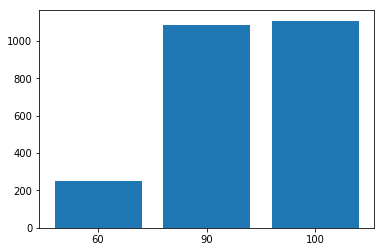

DIABEX XR 9357


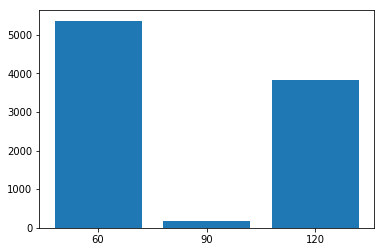

DIAFORMIN 6973


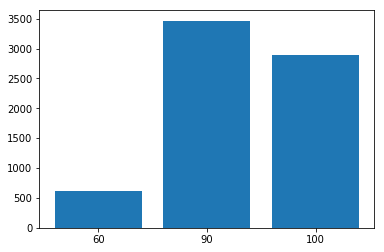

DIAFORMIN XR 2936


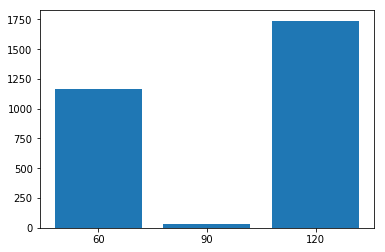

FORMET 3092


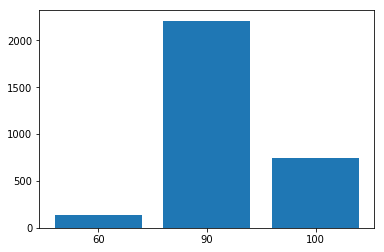

FORMET ASPEN 1093


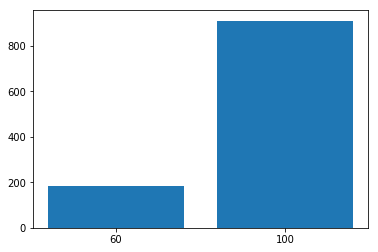

GLUCOBETE 67


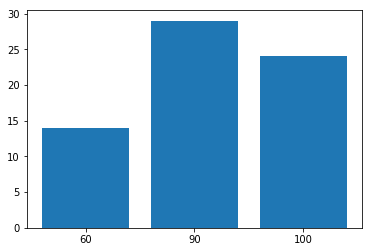

GLUCOHEXAL 18


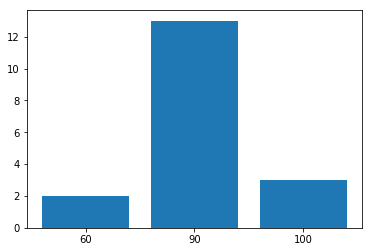

GLUCOPHAGE 33


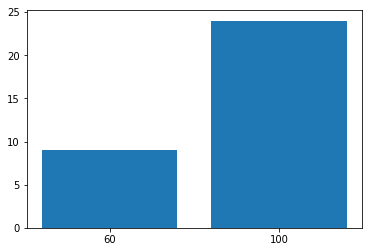

JANUMET XR 773


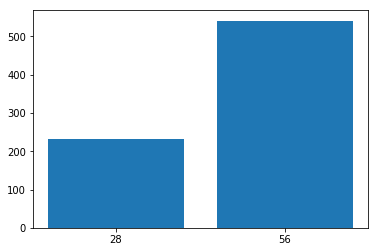

KOMBIGLYZE XR 315


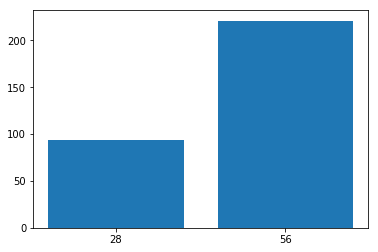

METEX XR 2837


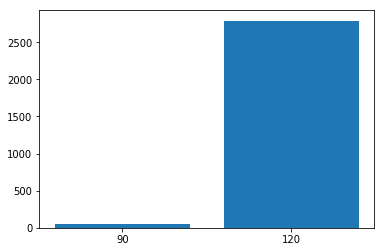

METFORMIN (AN) 266


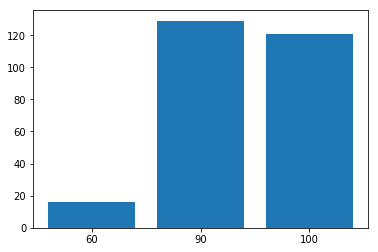

METFORMIN (APO) 2495


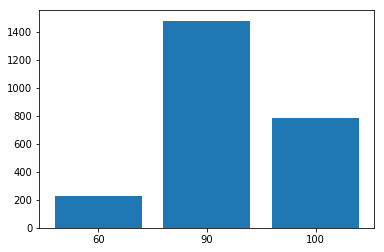

METFORMIN (ASCENT PHARMA) 16


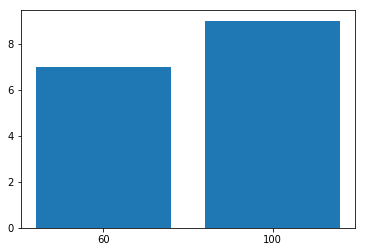

METFORMIN (CHEM-MART) 227


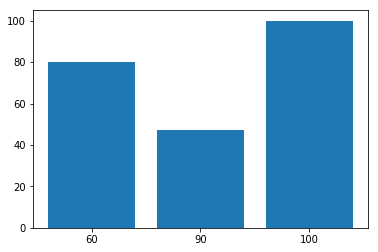

METFORMIN (CR) 24


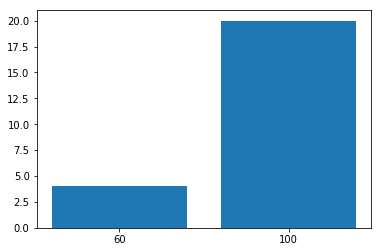

METFORMIN (GA) 1214


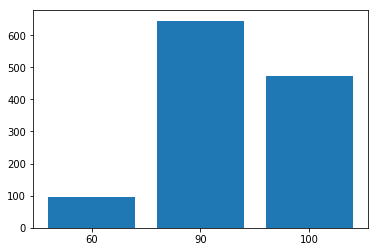

METFORMIN (GEN HLTH) 135


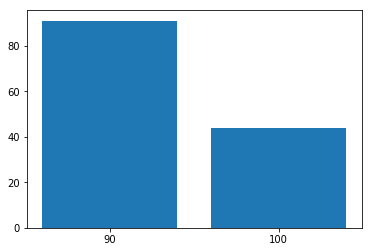

METFORMIN (RANBAXY) 193


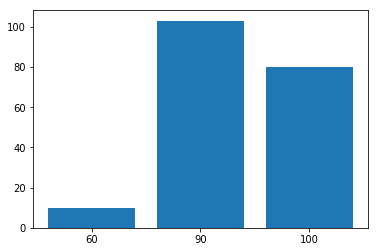

METFORMIN (SANDOZ) 1831


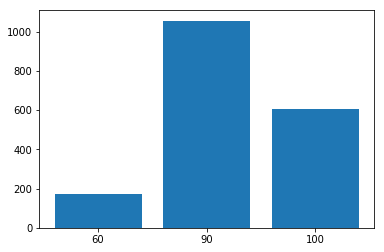

METFORMIN (TW) 131


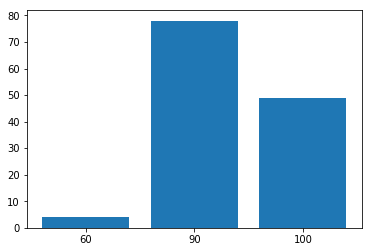

METFORMIN GENRX 402


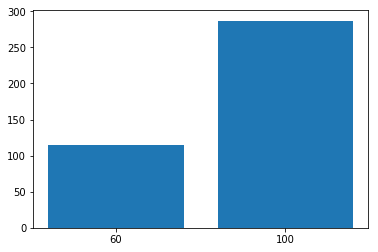

XIGDUO XR 113


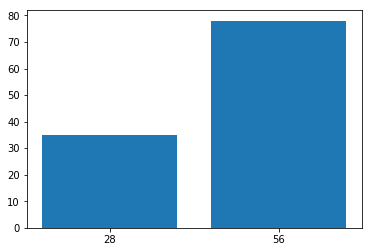

In [65]:
for form, df in df1_with_drug[df1_with_drug.L2C=='A10'].groupby('BrandName', sort=True):
    x, y = np.unique(df.Pack.values, return_counts=True)
    if len(x) == 1:
        continue
    print(form, len(df))
    select_mask = y > 0
    x_pos = np.arange(len(x[select_mask]))
    plt.bar(x_pos, y[select_mask])
    plt.xticks(x_pos, x[select_mask].astype(int))
    plt.show()

CR-TAB 315


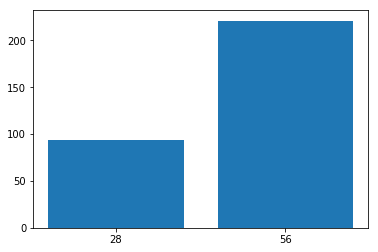

ER-TAB 17188


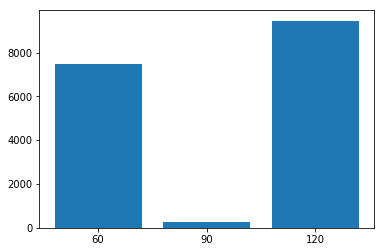

INJ 465


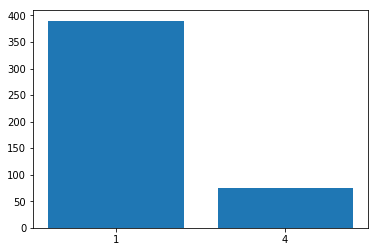

MR-TAB 14534


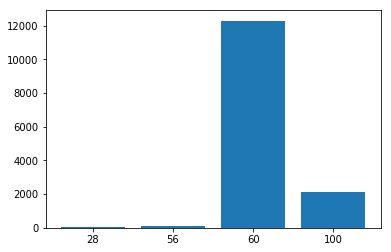

TAB 44717


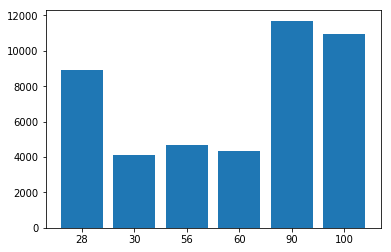

In [62]:
for form, df in df1_with_drug[df1_with_drug.L2C=='A10'].groupby('Form', sort=True):
    x, y = np.unique(df.Pack.values, return_counts=True)
    if len(x) == 1:
        continue
    print(form, len(df))
    select_mask = y > 0
    x_pos = np.arange(len(x[select_mask]))
    plt.bar(x_pos, y[select_mask])
    plt.xticks(x_pos, x[select_mask].astype(int))
    plt.show()

CAP


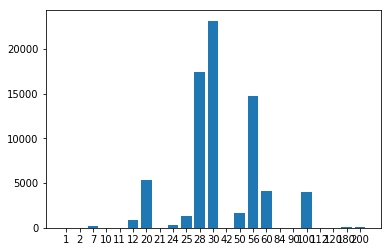

CR-CAP


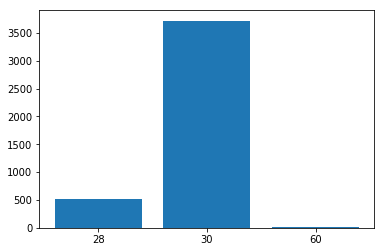

CR-TAB


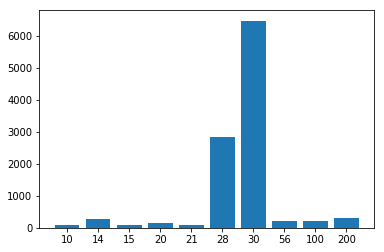

CRM


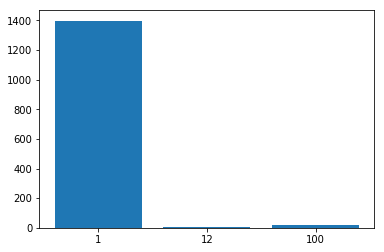

DISP-TAB


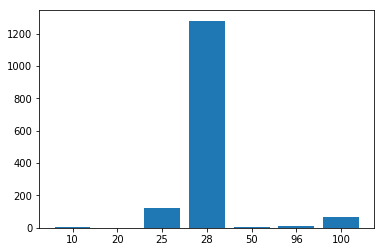

EC-TABS


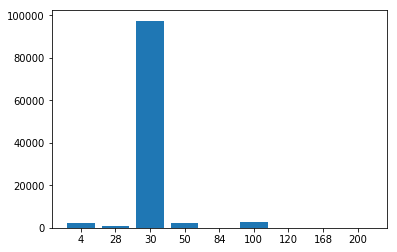

ER-TAB


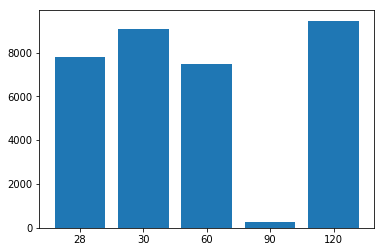

INJ


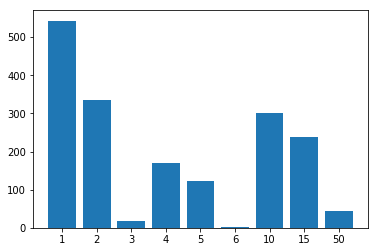

MR-TAB


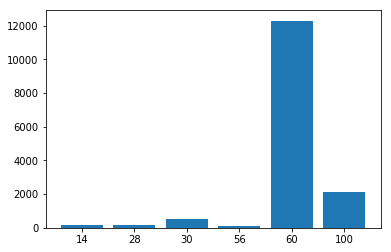

OINT


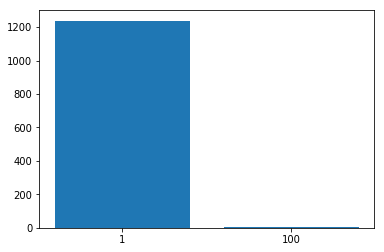

OR-DISTAB


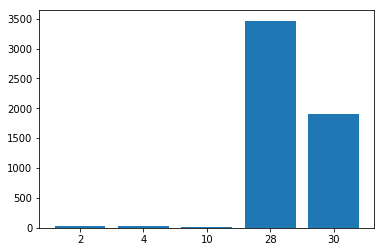

PTCH


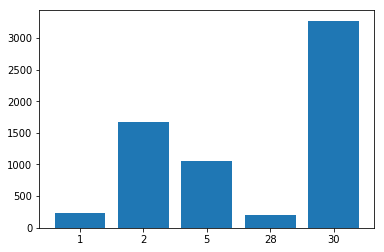

SACH


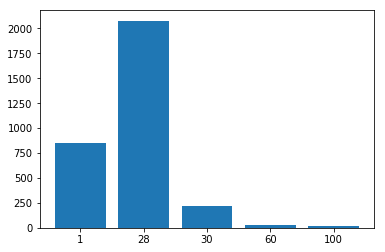

SR-CAP


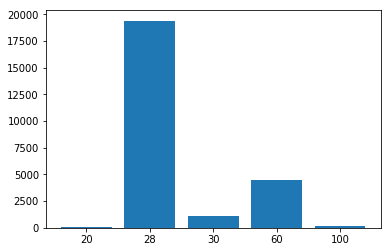

SR-TAB


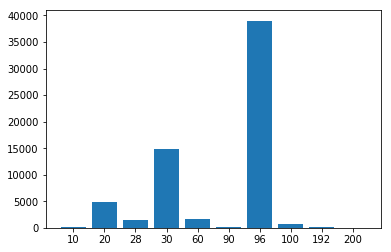

TAB


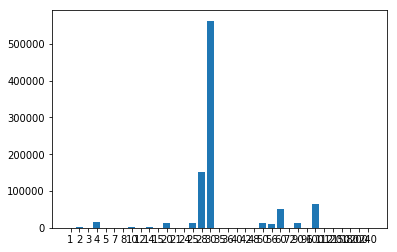

VL


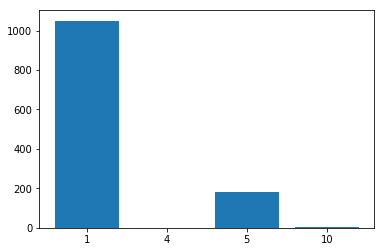

WAF


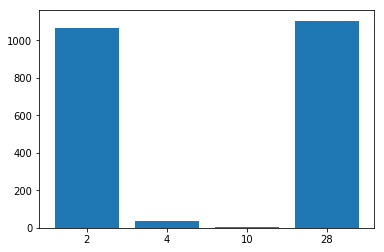

In [59]:
for form, df in df1_with_drug.groupby('Form', sort=True):
    x, y = np.unique(df.Pack.values, return_counts=True)
    if len(x) == 1:
        continue
    if len(df) < 1000:
        continue
    print(form)
    select_mask = y > 0
    x_pos = np.arange(len(x[select_mask]))
    plt.bar(x_pos, y[select_mask])
    plt.xticks(x_pos, x[select_mask].astype(int))
    plt.show()